In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor


C:\Users\alyon\AppData\Local\Temp\ipykernel_17516\3103790614.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
#Importing project 1 to retrieve X and y
import project1_Alona_Gauri_Valeria
X = project1_Alona_Gauri_Valeria.X
y = project1_Alona_Gauri_Valeria.y

# Project 2
# REGRESSION PART A (1)

In [3]:
#making sure data is standardized
print("Means of X columns", np.mean(X, axis=0))
print("SDs of X columns", np.std(X, axis=0))

Means of X columns [ 2.44487823e-16  1.45428102e-16 -1.33836007e-16 -8.11446654e-17
 -3.99690168e-15  9.69520678e-17  2.78210281e-16 -8.43061459e-17
 -2.00227096e-16]
SDs of X columns [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [4]:
#defining methods to calculate test and train error 

def test_error(model, X_test, y_test):
    y_pred_test = model.predict(X_test)
    test_error = (sum ([(y_pred - y_true)**2 for y_pred, y_true in zip(y_pred_test, y_test)])) / len(y_test)
    return test_error

def train_error(model, X_train, y_train):
    y_pred_train = model.predict(X_train)
    train_error = (sum([(y_pred - y_true)**2 for y_pred, y_true in zip(y_pred_train, y_train)])) / len(y_train)
    return train_error

In [5]:
#REGRESSION PART A (1) 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
train_rmse = train_error(model, X_train, y_train)
test_rmse = test_error(model, X_test, y_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Train R^2 Score:", train_r2)
print("Test R^2 Score:", test_r2)

#printing weights
#print(model.coef_)

Train RMSE: 1475190.868741403
Test RMSE: 1499636.6903304493
Train R^2 Score: 0.907335736316707
Test R^2 Score: 0.9056643685073519


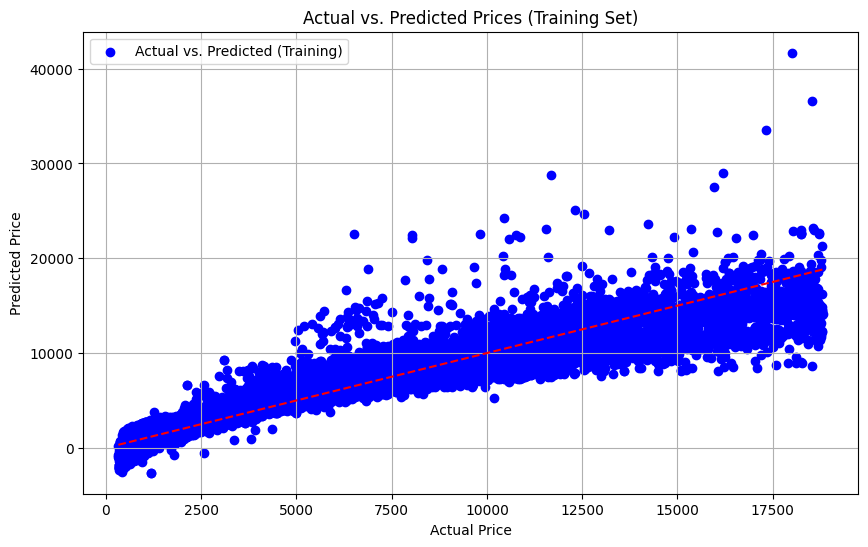

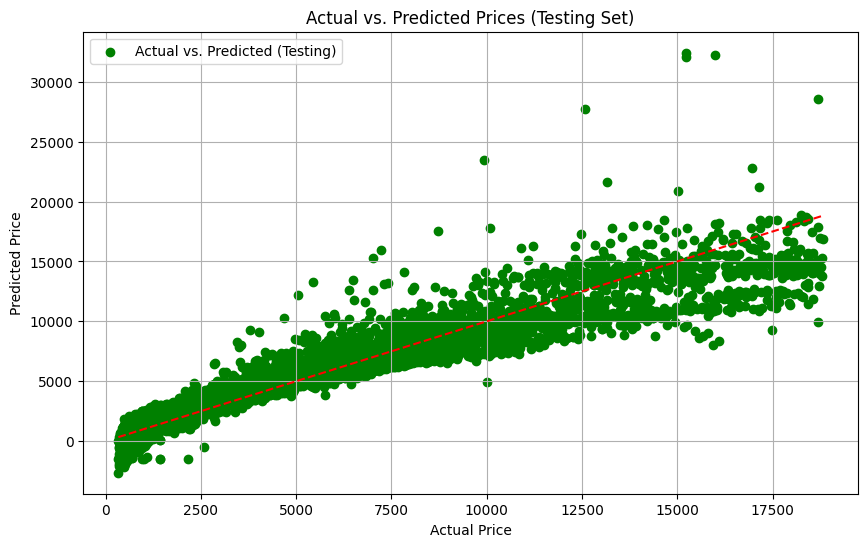

In [6]:
# Scatter plot for training set
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_train, color='blue', label='Actual vs. Predicted (Training)')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices (Training Set)')
plt.legend()
plt.grid(True)
plt.show()

# Scatter plot for testing set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='green', label='Actual vs. Predicted (Testing)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices (Testing Set)')
plt.legend()
plt.grid(True)
plt.show()

## REGRESSION PART A (2)

In [6]:
#introducing a regularization parameter lambda, estimating generalization error and calculating test error

from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge

kf = KFold(n_splits=10, shuffle=True)

lambda_values = [0, 15, 30, 45, 60]
lambda_gen_errors = {}
lambda_train_errors = {}

for lmbda in lambda_values:
    lambda_gen_errors[lmbda] = []
    lambda_train_errors[lmbda] = []

for train_index, test_index in kf.split(X,y):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    
    for lmbda in lambda_values:
        model = Ridge(alpha=lmbda)
        model.fit(X_train, y_train)
        lambda_gen_errors[lmbda].append(test_error(model, X_test, y_test))
        lambda_train_errors[lmbda].append(train_error(model, X_train, y_train))

lambda_error_list = [(lmbda, sum(lambda_gen_errors[lmbda]) / 10) for lmbda in lambda_values]
lambda_train_error_list = [(lmbda, sum(lambda_train_errors[lmbda]) / 10) for lmbda in lambda_values]

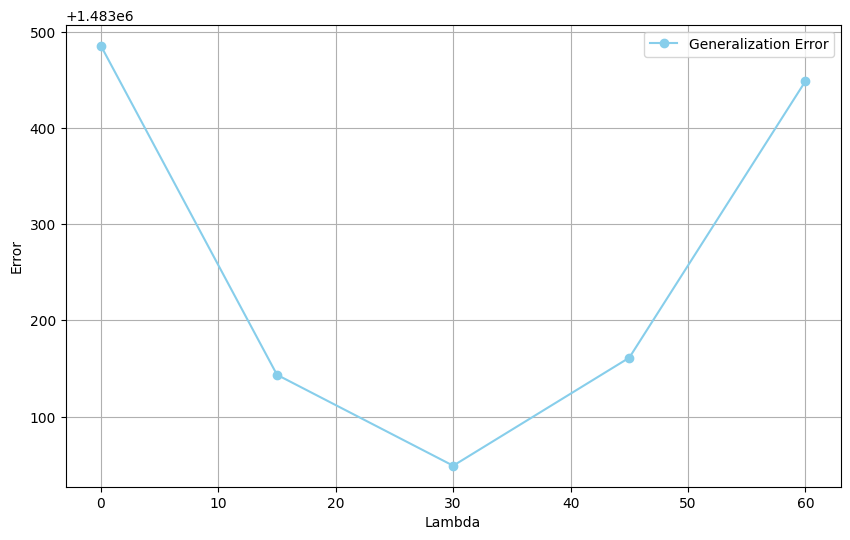

In [8]:
#plotting generalization error (and test error) as a function of lambda
#8.1.1

lambda_values_plot, errors = zip(*lambda_error_list)
_, train_errors = zip(*lambda_train_error_list)

# Plot lambda values vs generalization errors
plt.figure(figsize=(10, 6))
plt.plot(lambda_values_plot, errors, 'o-', label='Generalization Error', color='skyblue')

# Plot lambda values vs training errors
#plt.plot(lambda_values_plot, train_errors, 'o-', label='Training Error', color='orange')

plt.xlabel('Lambda')
plt.ylabel('Error')
plt.grid(True)
plt.legend()
plt.show()

# REGRESSION PART B (1)

First, define an artificial neural network

In [4]:
from sklearn.neural_network import MLPRegressor

def neural_network(h, X_train, y_train, X_test, y_test):
    ann_model = MLPRegressor(
            hidden_layer_sizes=(h,),
            max_iter=5000,  # Increase the number of iterations
            learning_rate_init=0.001,  # Adjust the learning rate
            solver='adam',  # Try different solvers
            early_stopping=True,  # Enable early stopping
            random_state=42
        )
    ann_model.fit(X_train, y_train)
    y_est = ann_model.predict(X_test)
    est_error = sum((y_est-y_test)**2)/len(y_est)

    return est_error

In [5]:
# Testing different h_values
from sklearn.model_selection import KFold 

h_values = [60, 70, 80]
df = pd.DataFrame(columns=['h', 'error'])

kf = KFold(n_splits=10, shuffle=True)
rows = []

for train_index, test_index in kf.split(X, y):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

    for h in h_values:
        error = neural_network(h, X_train, y_train, X_test, y_test)
        rows.append({'h': h, 'error': error})

df = pd.DataFrame(rows)
            

In [6]:
#Printing results of mean errors of different amount of h units to choose optimal range
mean_errors = []
for h in h_values:
    filtered_rows = df[df['h'] == h]
    mean_error = filtered_rows['error'].mean()
    print(f'Mean error where h = {h}: {mean_error}')

Mean error where h = 60: 965462.719364437
Mean error where h = 70: 973734.97230228
Mean error where h = 80: 948662.9874687346


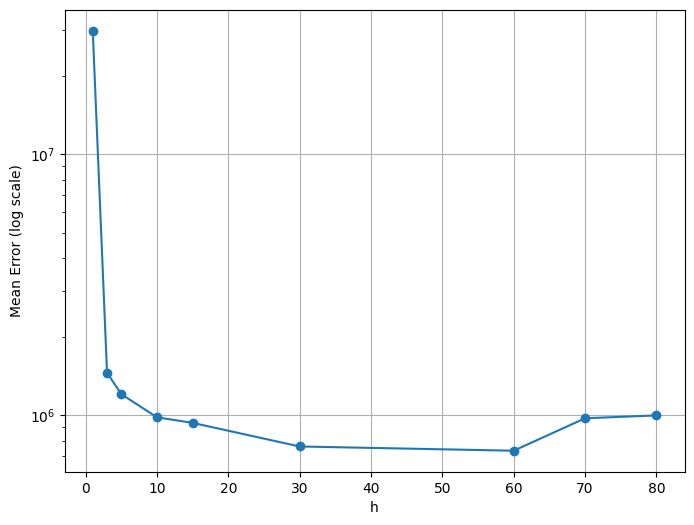

In [13]:
data = {
    'h': [1, 3, 5, 10, 15, 30, 60, 70, 80],
    'mean_error': [
        29785634.19869898,
        1455222.0636909069,
        1204864.8829694863,
        982155.736068495,
        934992.5681984939,
        759173.8176840226,
        731245.5823711553,
        973734.97230228,
        998662.9874687346
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)
plt.figure(figsize=(8, 6))
plt.plot(df['h'], df['mean_error'], marker='o', linestyle='-')
plt.xlabel('h')
plt.ylabel('Mean Error (log scale)')
plt.grid(True)
# Set y-axis to logarithmic scale
plt.yscale('log')
plt.savefig('mean_error_h.png')
plt.show()

Mean error where h = 1: 29785634.19869898

Mean error where h = 3: 1455222.0636909069

Mean error where h = 5: 1204864.8829694863

Mean error where h = 10: 982155.736068495

Mean error where h = 15: 934992.5681984939

Mean error where h = 30: 759173.8176840226

Mean error where h = 60: 731245.5823711553

In [ ]:
data = {
    'h': [1, 3, 5, 10, 15, 30, 60, 70, 80],
    'mean_error': [
        29785634.19869898,
        1455222.0636909069,
        1204864.8829694863,
        982155.736068495,
        934992.5681984939,
        759173.8176840226,
        731245.5823711553,
        973734.97230228,
        948662.9874687346
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)
plt.figure(figsize=(8, 6))
plt.plot(df['h'], df['mean_error'], marker='o', linestyle='-')
plt.title('Mean Error vs. h')
plt.xlabel('h')
plt.ylabel('Mean Error')
plt.grid(True)
plt.savefig('mean_error_h.png')
plt.show()

As you can see, 60 gives thw smallest error on avarage


# REGRESSION PART B (2)

In [ ]:
#2-layer validation
K_outer = 10
K_inner = 10
rows = []


# Define the range of complexity-controlling parameters
lambda_values = [0, 0.1, 10, 30, 40, 50, 60, 100, 1000]
h_values = [1, 5, 15, 30, 60]

# Initialize the KFold instances for two-level cross-validation
outer_cv = KFold(n_splits=K_outer, shuffle=True, random_state=42)
inner_cv = KFold(n_splits=K_inner, shuffle=True, random_state=11)
k_outer = 0

# Outer cross-validation loop
for train_outer_index, test_outer_index in outer_cv.split(X):
    X_train_outer, X_test_outer = X[train_outer_index], X[test_outer_index]
    y_train_outer, y_test_outer = y[train_outer_index], y[test_outer_index]
    
    k_inner = 1
    
    y_train_outer = y_train_outer.reset_index(drop=True)
    y_test_outer = y_test_outer.reset_index(drop=True)
    
    lambda_in_errors = {lmbda: [] for lmbda in lambda_values} # Initialize dictionary to store errors for each lambda
    ann_in_errors = {h: [] for h in h_values}
    
    for train_inner_index, test_inner_index in inner_cv.split(X_train_outer):
        X_train_inner, X_test_inner = X_train_outer[train_inner_index], X_train_outer[test_inner_index]
        y_train_inner, y_test_inner = y_train_outer[train_inner_index], y_train_outer[test_inner_index]
        
        
        # Train ridge regression models with different lambda values on the inner training set
        for lmbda in lambda_values:
            ridge_model = Ridge(alpha=lmbda)
            ridge_model.fit(X_train_inner, y_train_inner)
            error = test_error(ridge_model, X_test_inner, y_test_inner)
            lambda_in_errors[lmbda].append(error)
        
        for h in h_values:
            error = neural_network(h, X_train_inner, y_train_inner, X_test_inner, y_test_inner)
            ann_in_errors[h].append(error)
        
        k_inner += 1
        #end of inner loop
    
    
    
    lambda_avg_errors = {lmbda: np.mean(errors) for lmbda, errors in lambda_in_errors.items()}
    best_lambda = min(lambda_avg_errors, key=lambda lmbda: lambda_avg_errors[lmbda])
    
    h_avg_errors = {h: np.mean(errors) for h, errors in ann_in_errors.items()}
    best_h = min(h_avg_errors, key=lambda h: h_avg_errors[h])
    
    
    ridge_model = Ridge(alpha=best_lambda)
    ridge_model.fit(X_train_outer, y_train_outer)
    ridge_error = test_error(ridge_model, X_test_outer, y_test_outer)
    
    
    nn_error = neural_network(best_h, X_train_outer, y_train_outer, X_test_outer, y_test_outer)
    
    # Baseline
    baseline_model = LinearRegression()
    baseline_model.fit(X_train_outer, y_train_outer)
    baseline_error = test_error(baseline_model, X_test_outer, y_test_outer)

    #print(f'Final errors of each fold {k_outer}:', error)
    k_outer += 1
    
    rows.append({'k_outer': k_outer, 'h': best_h, 'NN error': nn_error, 'lambda': best_lambda, 'ridge_error': ridge_error, 'baseline': baseline_error})
    
two_layer_results = pd.DataFrame(rows)

k_outer  lambda   ridge_error      baseline

    1      30  1.553238e+06  1.553685e+06
    
    2      30  1.445183e+06  1.445023e+06
    
    3     100  1.340935e+06  1.331517e+06
    
    4      30  1.536381e+06  1.534923e+06
    
    5      40  1.500460e+06  1.499625e+06
    
    6      30  1.647187e+06  1.651964e+06
    
    7      60  1.467367e+06  1.479242e+06
    
    8      30  1.534091e+06  1.532121e+06
    
    9      40  1.348850e+06  1.348794e+06
    
    10      30  1.463613e+06  1.462055e+06


In [18]:
#This is  data from running 2 layer cross validation (saving ith hard-coded, so we don't loose it)

data = {
    'k_outer': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'h': [60, 60, 60, 30, 60, 60, 60, 60, 60, 60],
    'NN error': [701341.659734, 471099.588991, 604797.464416, 759805.722564, 673026.793919, 716873.565070, 710772.105463, 601760.521201, 864380.715567, 484907.337029],
    'lambda': [30, 30, 100, 30, 40, 30, 60, 30, 40, 30],
    'ridge_error': [1.553238e+06, 1.445183e+06, 1.340935e+06, 1.536381e+06, 1.500460e+06, 1.647187e+06, 1.467367e+06, 1.534091e+06, 1.348850e+06, 1.463613e+06],
    'baseline_error': [1.553685e+06, 1.445023e+06, 1.331517e+06, 1.534923e+06, 1.499625e+06, 1.651964e+06, 1.479242e+06, 1.532121e+06, 1.348794e+06, 1.462055e+06]
}

# Create DataFrame
two_layer_table = pd.DataFrame(data)

# Display the DataFrame
print(two_layer_table)

   k_outer   h       NN error  lambda  ridge_error  baseline_error
0        1  60  701341.659734      30    1553238.0       1553685.0
1        2  60  471099.588991      30    1445183.0       1445023.0
2        3  60  604797.464416     100    1340935.0       1331517.0
3        4  30  759805.722564      30    1536381.0       1534923.0
4        5  60  673026.793919      40    1500460.0       1499625.0
5        6  60  716873.565070      30    1647187.0       1651964.0
6        7  60  710772.105463      60    1467367.0       1479242.0
7        8  60  601760.521201      30    1534091.0       1532121.0
8        9  60  864380.715567      40    1348850.0       1348794.0
9       10  60  484907.337029      30    1463613.0       1462055.0


## REGRESSION PART B (3)
setup 1. Paired t-test

H0 : Model MA and MB have the same performance, Z = 0

H1 : Model MA and MB have different performance, Z ̸= 0

In [19]:
import scipy.stats
import scipy.stats as st


In [20]:

def paired_test(zA, zB):
    # compute confidence interval of model A
    alpha = 0.05

    # Compute confidence interval of z = zA-zB and p-value of Null hypothesis
    z = zA - zB
    CI = st.t.interval(
        1 - alpha, len(z) - 1, loc=np.mean(z), scale=st.sem(z)
    )  # Confidence interval
    p = 2 * st.t.cdf(-np.abs(np.mean(z)) / st.sem(z), df=len(z) - 1)  # p-value
    return p,CI

In [21]:
print( "p-value of pair: NN and Ridge is", paired_test(two_layer_table['NN error'], 
                                                       two_layer_table['ridge_error'])[0], 
      "and CI is:", paired_test(two_layer_table['NN error'], two_layer_table['ridge_error'])[1])

p-value of pair: NN and Ridge is 2.9460062430836046e-08 and CI is: (-931512.5461484634, -718195.3590607366)


In [22]:
print( "p-value of pair: NN and Baseline is", paired_test(two_layer_table['NN error'], 
                                                       two_layer_table['baseline_error'])[0], 
      "and CI is:", paired_test(two_layer_table['NN error'], two_layer_table['baseline_error'])[1])

p-value of pair: NN and Baseline is 2.9775850391882096e-08 and CI is: (-931828.0398062908, -718208.665402909)


In [23]:
print( "p-value of pair: Ridge and Baseline is", paired_test(two_layer_table['ridge_error'], 
                                                       two_layer_table['baseline_error'])[0], 
      "and CI is:", paired_test(two_layer_table['ridge_error'], two_layer_table['baseline_error'])[1])

p-value of pair: Ridge and Baseline is 0.9252969401364426 and CI is: (-4021.3142205642075, 3692.5142205642073)


P-value is statistically significant in paired test Ridge and Baseline, therefore there is evidence to aprove null hypothesis in this case. In other cases null hypothesis is rejected

# Classification part 1

In [14]:
#Importing X, class labels and class names from Project 1
import project1_Alona_Gauri_Valeria
X = project1_Alona_Gauri_Valeria.X
y = project1_Alona_Gauri_Valeria.classLabels
classNames = project1_Alona_Gauri_Valeria.classNames
print("Count of each class", y.value_counts())
print("Price intervals as classes: ", classNames)

Count of each class price_category
0    23328
1    10257
2     7852
3     4176
4     2498
5     1831
6     1344
7     1028
8      883
9      743
Name: count, dtype: int64
Price intervals as classes:  ['0.0 - 1882.3', '1882.3 - 3764.6', '3764.6 - 5646.9', '5646.9 - 7529.2', '7529.2 - 9411.5', '9411.5 - 11293.8', '11293.8 - 13176.1', '13176.1 - 15058.4', '15058.4 - 16940.7', '16940.7 - inf']


Three methods:

baseline

logistic regression

KNN k-nearest neighbor classification, complexity controlling parameter k = 1, 2 . . .


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, KFold
from sklearn.dummy import DummyClassifier

import numpy as np
#Importing project 1 to retrieve X and y

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert y_train and y_test to numpy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)

# Baseline Model
dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train, y_train)
baseline_pred = dummy_clf.predict(X_test)
baseline_accuracy = accuracy_score(y_test, baseline_pred)

print("Baseline Accuracy:", baseline_accuracy)


Baseline Accuracy: 0.4318687430478309


kNN algorithm accuracy is 82.23% for k = 8


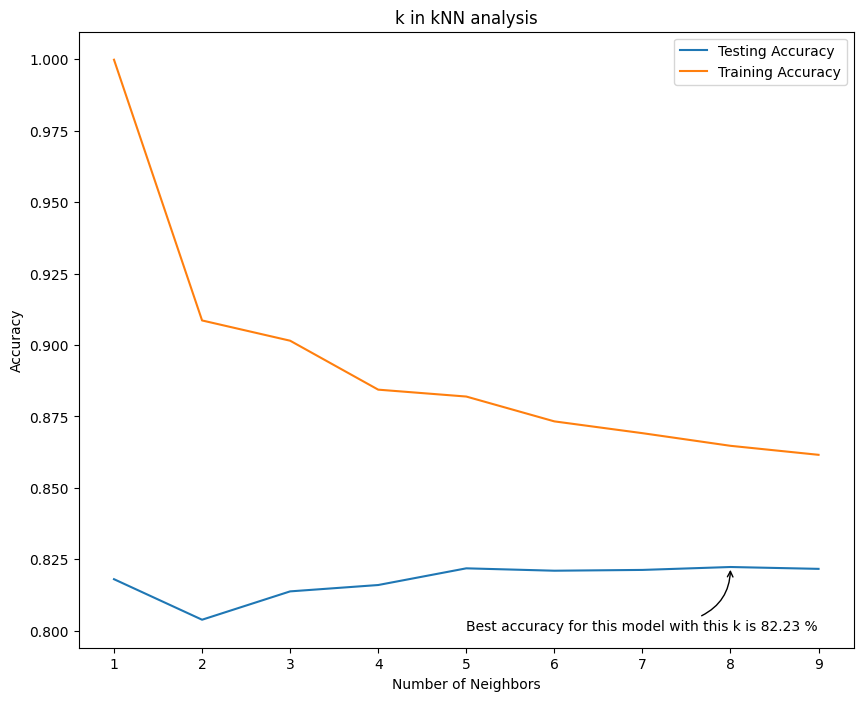

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

def calculate_and_plot_k_neighbors(X_train, X_test, y_train, y_test):
    
    neighbors = np.arange(1, 10)
    train_accuracy = np.empty(len(neighbors))
    test_accuracy = np.empty(len(neighbors))
    
    for i, k in enumerate(neighbors):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        train_accuracy[i] = knn.score(X_train, y_train)    
        test_accuracy[i] = knn.score(X_test, y_test)

    best_accuracy = max(test_accuracy)
    best_k = np.argmax(test_accuracy) + 1

    print("kNN algorithm accuracy is {0:.2f}% for k = {1}".format(best_accuracy * 100, best_k))

    plt.figure(figsize=(10, 8))   
    plt.title('k in kNN analysis')
    plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
    plt.plot(neighbors, train_accuracy, label='Training Accuracy')
    plt.legend()
    plt.annotate('Best accuracy for this model with this k is {0:.2f} %'.format(best_accuracy * 100), xy=(best_k, best_accuracy), xytext=(5 , 0.80),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"))
    plt.xlabel('Number of Neighbors')
    plt.ylabel('Accuracy')
    plt.show()

# Call the function
calculate_and_plot_k_neighbors(X_train, X_test, y_train, y_test)


In [30]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

def LogisticRegression_algorithm(X_train, X_test, y_train, y_test, sample_size=None):
    
    global y_pred_LG
    global LG_pipeline
    global y_prob_LG
    
    # If sample_size is provided, perform random data sampling
    if sample_size is not None:
        total_data_points = len(X_train)
        random_indices = np.random.choice(total_data_points, size=sample_size, replace=False)
        X_train = X_train[random_indices]
        y_train = y_train[random_indices]
    
    steps = [('scaler', StandardScaler()),
             ('LogisticRegression', LogisticRegression(random_state=0))]
    
    LG_pipeline = Pipeline(steps)
    
    LG_pipeline.fit(X_train, y_train)
    
    y_pred_LG = LG_pipeline.predict(X_test)
    
    y_prob_LG = LG_pipeline.predict_proba(X_test)
    
    print("Accuracy: {0:.2f} %".format(LG_pipeline.score(X_test, y_test) * 100))
    print(classification_report(y_test, y_pred_LG))

# Call the function with random data sampling (sample_size=1000 for example)
LogisticRegression_algorithm(X_train, X_test, y_train, y_test, sample_size=1000)


Accuracy: 0.38 %
              precision    recall  f1-score   support

         335       0.00      0.00      0.00         1
         336       0.00      0.00      0.00         1
         337       0.00      0.00      0.00         1
         357       0.00      0.00      0.00         3
         358       0.00      0.00      0.00         1
         360       0.00      0.00      0.00         1
         361       0.00      0.00      0.00         1
         363       0.00      0.00      0.00         2
         364       0.00      0.00      0.00         1
         367       0.00      0.00      0.00         4
         368       0.00      0.00      0.00         2
         369       0.00      0.00      0.00         1
         373       0.00      0.00      0.00         3
         377       0.00      0.00      0.00         1
         378       0.00      0.00      0.00         3
         380       0.00      0.00      0.00         1
         383       0.00      0.00      0.00         1
         3

/Users/dkValMor/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dkValMor/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dkValMor/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(res

Comparison of logistic regression kNN and a baseline MY COMPUTER CRACH WHEN RUNNING SOMETHING IS WRONG

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import numpy as np
#Importing project 1 to retrieve X and y
import project1_Alona_Gauri_Valeria
X = project1_Alona_Gauri_Valeria.X
y = project1_Alona_Gauri_Valeria.y

# Standardizing data
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Randomly sample a subset of the data
num_samples = 1000  # Number of samples to keep
sampled_indices = np.random.choice(X.shape[0], num_samples, replace=False)
X_sampled = X[sampled_indices]
y_sampled = y[sampled_indices]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline for logistic regression
logistic_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('LogisticRegression', LogisticRegression(random_state=0))
])

# Define a range of values for the hyperparameters
param_grid_logistic = {'LogisticRegression__C': [0.01, 0.1, 1, 10, 100]}

# Initialize GridSearchCV for logistic regression
grid_logistic = GridSearchCV(logistic_pipeline, param_grid_logistic, cv=StratifiedKFold(n_splits=3), scoring='accuracy', n_jobs=-1)

# Perform hyperparameter tuning for logistic regression
grid_logistic.fit(X_train, y_train)

# Retrieve the best hyperparameters and their corresponding accuracy
best_C = grid_logistic.best_params_['LogisticRegression__C']
best_accuracy_logistic = grid_logistic.best_score_

# Print the results
print(f"Best C for Logistic Regression: {best_C} with accuracy: {best_accuracy_logistic:.2f}")

# Retrain the logistic regression model with the best hyperparameters on the full training set
best_logistic = LogisticRegression(C=best_C, random_state=0)
best_logistic.fit(X_train, y_train)

# Evaluate logistic regression on the test set
logistic_test_accuracy = best_logistic.score(X_test, y_test)
print(f"Logistic Regression Test Accuracy: {logistic_test_accuracy:.2f}")


# Define a range of values for the hyperparameters for kNN
param_grid_knn = {'n_neighbors': range(1, 10)}

# Initialize GridSearchCV for kNN
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=StratifiedKFold(n_splits=3), scoring='accuracy', n_jobs=-1)

# Perform hyperparameter tuning for kNN
grid_knn.fit(X_train, y_train)

# Retrieve the best hyperparameters and their corresponding accuracy for kNN
best_k = grid_knn.best_params_['n_neighbors']
best_accuracy_knn = grid_knn.best_score_

# Print the results for kNN
print(f"Best k for kNN: {best_k} with accuracy: {best_accuracy_knn:.2f}")

# Retrain the kNN model with the best hyperparameters on the full training set
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

# Evaluate kNN on the test set
knn_test_accuracy = best_knn.score(X_test, y_test)
print(f"kNN Test Accuracy: {knn_test_accuracy:.2f}")

# Compare with the baseline
print(f"Baseline Accuracy: {baseline_accuracy:.2f}")


/Users/dkValMor/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Two-level cross-validation to create a table similar to Table 2

In [4]:
from sklearn.model_selection import KFold, GridSearchCV, train_test_split
from sklearn.metrics import zero_one_loss
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier

#Outer Cross-validation Loop and Logistic Regression
#HERE MY PC CRASH

outer_cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Placeholder for the results
results = []

# Outer cross-validation loop
for i, (train_index, test_index) in enumerate(outer_cv.split(X)):
    X_train_outer, X_test_outer = X[train_index], X[test_index]
    y_train_outer, y_test_outer = y[train_index], y[test_index]
    
    # Inner cross-validation for hyperparameter tuning of logistic regression
    # Define the parameter grid for logistic regression
    param_grid_logistic = {'C': [0.01, 0.1, 1, 10, 100]}
    inner_cv = KFold(n_splits=5, shuffle=True, random_state=i)
    grid_logistic = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_logistic, cv=inner_cv, scoring='accuracy', n_jobs=-1)
    grid_logistic.fit(X_train_outer, y_train_outer)
    best_C = grid_logistic.best_params_['C']
    
    # Evaluate logistic regression on the outer test set
    logistic_error = zero_one_loss(y_test_outer, grid_logistic.predict(X_test_outer))
    
    # Append results to the list
    results.append([best_C, logistic_error])



In [ ]:
# Inner cross-validation for hyperparameter tuning of method 2 (e.g., kNN)
# Define the parameter grid for method 2
param_grid_method2 = {'n_neighbors': range(1, 10)}

for i, (train_index, test_index) in enumerate(outer_cv.split(X)):
    X_train_outer, X_test_outer = X[train_index], X[test_index]
    y_train_outer, y_test_outer = y[train_index], y[test_index]

    inner_cv = KFold(n_splits=5, shuffle=True, random_state=i)
    grid_method2 = GridSearchCV(KNeighborsClassifier(), param_grid_method2, cv=inner_cv, scoring='accuracy', n_jobs=-1)
    grid_method2.fit(X_train_outer, y_train_outer)
    best_k = grid_method2.best_params_['n_neighbors']

    # Evaluate method 2 on the outer test set
    method2_error = zero_one_loss(y_test_outer, grid_method2.predict(X_test_outer))

    # Update results list
    results[i].extend([best_k, method2_error])


In [ ]:
# Evaluate the baseline model on the outer test set
for i, (train_index, test_index) in enumerate(outer_cv.split(X)):
    X_train_outer, X_test_outer = X[train_index], X[test_index]
    y_train_outer, y_test_outer = y[train_index], y[test_index]

    dummy_clf = DummyClassifier(strategy='most_frequent')
    dummy_clf.fit(X_train_outer, y_train_outer)
    baseline_error = zero_one_loss(y_test_outer, dummy_clf.predict(X_test_outer))

    # Update results list
    results[i].append(baseline_error)

# Convert results to DataFrame for better presentation
results_df = pd.DataFrame(results, columns=['best_C_logistic', 'logistic_error', 'best_k_method2', 'method2_error', 'baseline_error'])
print(results_df)
